In [2]:
import pandas as pd

In [3]:
# Import Data
mov = pd.read_csv("https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv")
print(mov.columns.values)

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


In [4]:
mov.shape

(5043, 28)

In [5]:
mov.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
# Data Preprocessing
# Remove duplicate values
mov = mov.drop_duplicates()

In [7]:
mov.shape

(4998, 28)

In [8]:
# Drop unrelated columns
mov = mov.drop(columns = ["aspect_ratio","movie_imdb_link","language","color"])

In [9]:
mov.shape

(4998, 24)

In [10]:
# Count the number of missing values in each column
mov.isnull().sum()

director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
num_user_for_reviews          21
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [11]:
# Fill Gaps
# Fill missing values with mean
mean = mov[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes']].mean()
mov = mov.fillna(mean)

In [12]:
mov.isnull().sum()

director_name                103
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                152
num_user_for_reviews           0
country                        5
content_rating               301
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [13]:
mov = mov.dropna()
mov.shape

(4554, 24)

In [14]:
mov.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [15]:
# Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027517875EB8>,
      dtype=object)

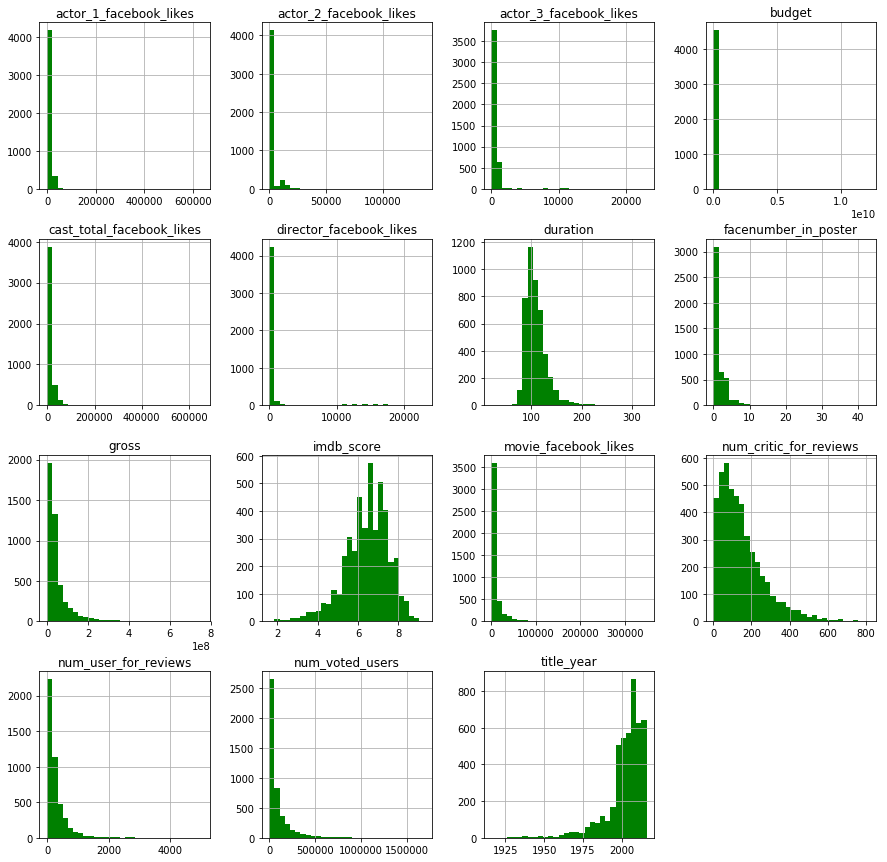

In [16]:
# Create a histogram of all the features 
mov.hist(bins=30,figsize=(15,15),color='g')

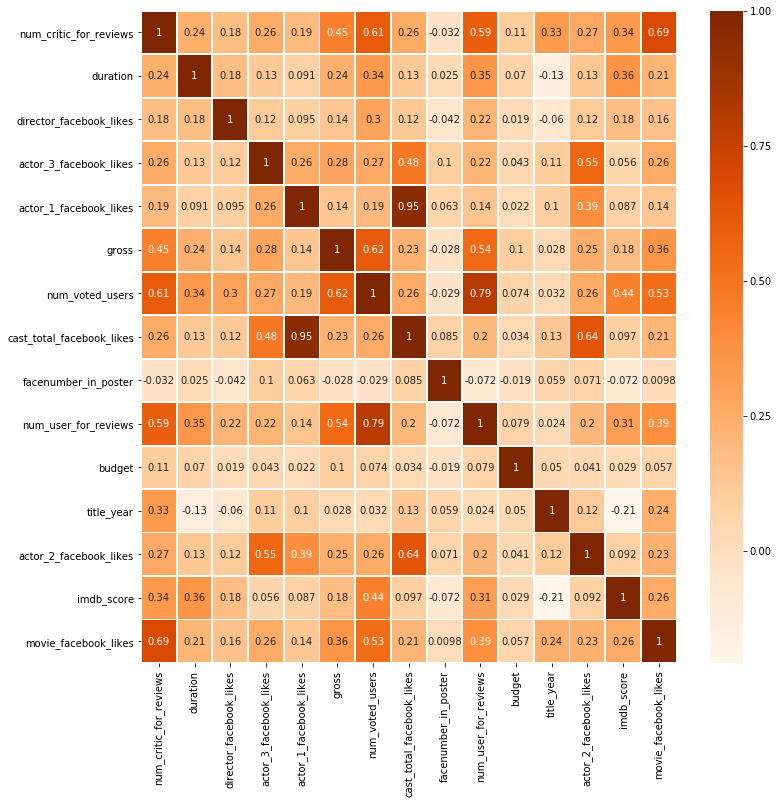

In [17]:
# Correlations of numerical features against the IMDb score
correlations = mov.corr()
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlations, annot=True, cmap="Oranges", linewidths=.8)

In [18]:
# Choose the top five highest correlation of numerical features against the imdb score for ML model
mov_for_ML = mov[['num_voted_users', 'duration', 'num_critic_for_reviews', 'num_user_for_reviews', 'movie_facebook_likes']]

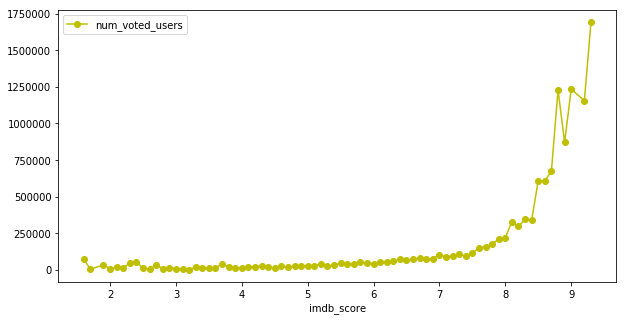

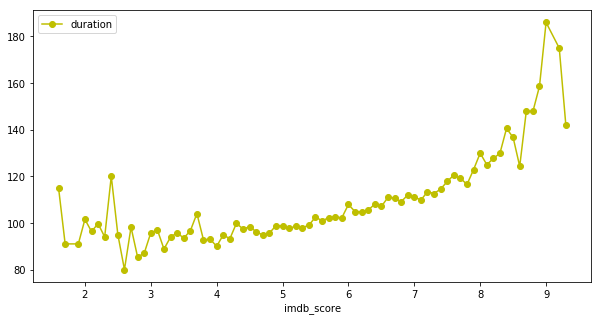

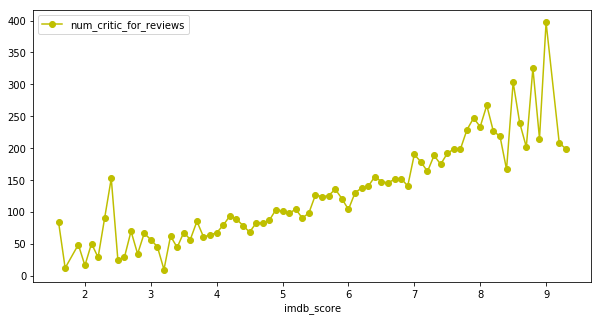

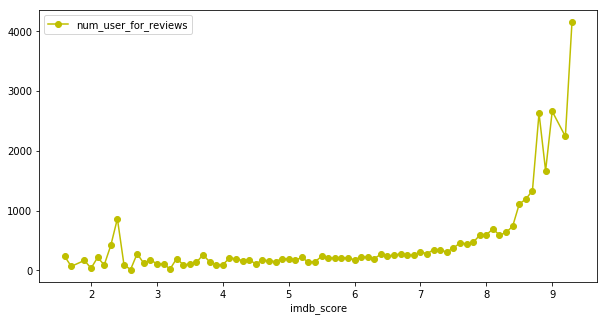

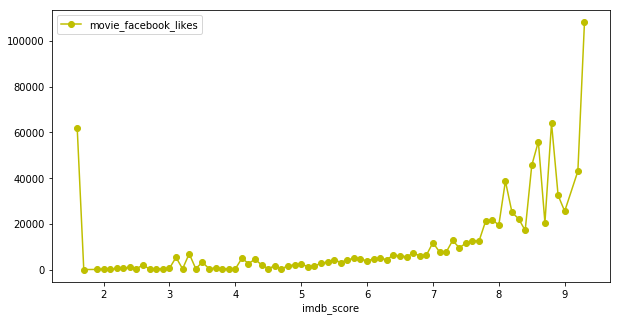

In [19]:
# Plotting graphs of the top five highest correlation of numerical features against the imdb score
for i in mov_for_ML.columns:
    axis = mov.groupby('imdb_score')[[i]].mean().plot(figsize=(10,5),marker='o',color='y')

In [20]:
# Create Machine Learning Models to predict IMDB rating of a movie
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X = mov_for_ML
y = mov['imdb_score']
X.shape,y.shape

((4554, 5), (4554,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3643, 5), (3643,), (911, 5), (911,))

In [38]:
# Scaling to avoid Euclidean Distance Problem
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

In [39]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
prec_lm=lm.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('The mean squared error using Linear regression is: ',mean_squared_error(y_test,prec_lm))
print('The mean absolute error using Linear regression is: ',mean_absolute_error(y_test,prec_lm))

The mean squared error using Linear regression is:  0.888146083332038
The mean absolute error using Linear regression is:  0.7212462006471558


In [43]:
mean_squared_error(prec_lm, y_test)

0.888146083332038

In [44]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

C:\Users\Golden Snow\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
prec_rf=rf.predict(X_test)

In [46]:
print('The mean squared error using Random Forest model is: ',mean_squared_error(y_test,prec_rf))
print('The mean absolute error using Random Forest model is: ',mean_absolute_error(y_test,prec_rf))

The mean squared error using Random Forest model is:  0.7950546652030737
The mean absolute error using Random Forest model is:  0.682722283205269


In [47]:
mean_squared_error(prec_rf, y_test)

0.7950546652030737

In [ ]:
# XGboost Model
from xgboost import XGBClassifier
Xgb = XGBClassifier()
Xgb.fit(X_train,y_train)

In [ ]:
prec_Xgb=Xgb.predict(X_test)

In [ ]:
print('The mean squared error using the Xgboost model is: ',mean_squared_error(y_test,prec_Xgb))
print('The mean absolute error using the Xgboost model is: ',mean_absolute_error(y_test,prec_Xgb))